### Importing and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

ORIGINAL_DATASET = "../WineQT.xlsx"

ORIGINAL_DATA_COLUMNS = { "fixed acidity": float,	"volatile acidity": float,	"citric acid": float,	"residual sugar": float,
                    "chlorides": float,	"free sulfur dioxide": float,	"total sulfur dioxide": float,	"density": float,	"pH": float,
                    "sulphates": float,	"alcohol": float,	"quality": float, "Id": float}

df = pd.read_excel(ORIGINAL_DATASET, dtype=ORIGINAL_DATA_COLUMNS)

X = np.array(df.iloc[:, 0:11].values)
y = np.array(df.iloc[:, 11].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

FileNotFoundError: [Errno 2] No such file or directory: 'WineQT.xlsx'

### Building CNN

In [ ]:
import tensorflow as tf

from tensorflow.python.keras import layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(11, 1, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 11, 1, 32)         64        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 11, 1, 32)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 1, 64)         2112      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 1, 64)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 1, 64)         4160      
_________________________________________________________________
flatten_15 (Flatten)         (None, 704)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

### Compiling and Training CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
24/24 [==============================] - 1s 9ms/step - loss: 1.6624 - accuracy: 0.3490 - val_loss: 1.2489 - val_accuracy: 0.4259
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 1.2314 - accuracy: 0.4810 - val_loss: 1.1441 - val_accuracy: 0.5185
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 1.1859 - accuracy: 0.4889 - val_loss: 1.1455 - val_accuracy: 0.5000
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 1.1679 - accuracy: 0.4902 - val_loss: 1.1337 - val_accuracy: 0.5079
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 1.2292 - accuracy: 0.4314 - val_loss: 1.1384 - val_accuracy: 0.5503
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 1.1872 - accuracy: 0.4797 - val_loss: 1.1226 - val_accuracy: 0.5185
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 1.1624 - accuracy: 0.4797 - val_loss: 1.1000 - val_accuracy: 0.5397
Epoch 8/20
24/24 [==

### Plotting Accuracy

12/12 - 0s - loss: 1.0172 - accuracy: 0.5820


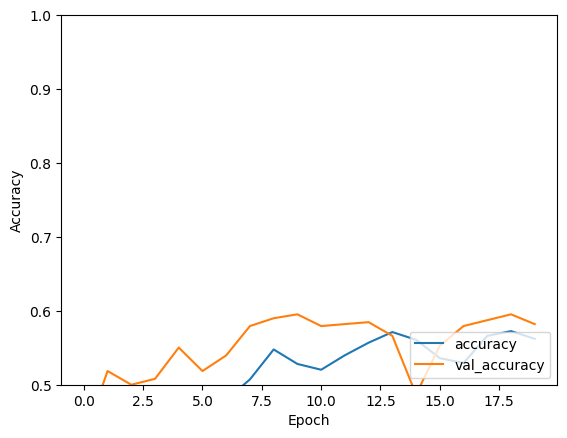

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

### Printing Final Test Accuracy

In [ ]:
print(test_acc)

0.5820105671882629


### Saving Model

In [ ]:
model.save('cnn.h5')

### Loading Model

In [ ]:
loaded_model = models.Sequential()
loaded_model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(11, 1, 1)))
loaded_model.add(layers.MaxPooling2D((1, 1)))
loaded_model.add(layers.Conv2D(64, (1, 1), activation='relu'))
loaded_model.add(layers.MaxPooling2D((1, 1)))
loaded_model.add(layers.Conv2D(64, (1, 1), activation='relu'))
loaded_model.add(layers.Flatten())
loaded_model.add(layers.Dense(64, activation='relu'))
loaded_model.add(layers.Dense(10))
loaded_model.summary()
loaded_model.load_weights('cnn.h5')

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 11, 1, 32)         64        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 11, 1, 32)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 1, 64)         2112      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 11, 1, 64)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 1, 64)         4160      
_________________________________________________________________
flatten_16 (Flatten)         (None, 704)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

### Printing Final Test Accuracy of Loaded Model

In [ ]:
loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
test_loss, test_acc = loaded_model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

12/12 - 0s - loss: 1.0172 - accuracy: 0.5820
0.5820105671882629
